<a href="https://colab.research.google.com/github/NadimMahmud3219/Find-the-deference-of-accuracy-after-scaling-and-applying-Principal-component-analysis-PCA-/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/framingham.csv")

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df['education'].mean()

1.9789499153157513

In [ ]:
df.fillna(df['education'].mean(), inplace = True)

In [ ]:
df['cigsPerDay'].mean()

8.955023489274222

In [ ]:
df.fillna(df['cigsPerDay'].mean(), inplace = True)

In [ ]:
df['BPMeds'].mean()

0.05400763225854998

In [ ]:
df.fillna(df['BPMeds'].mean(), inplace = True)

In [ ]:
df['totChol'].mean()

233.95208765827414

In [ ]:
df.fillna(df['totChol'].mean(), inplace = True)

In [ ]:
df['BMI'].mean()

25.695202937326805

In [ ]:
df.fillna(df['BMI'].mean(), inplace = True)

In [ ]:
df['heartRate'].mean()

75.8614863024812

In [ ]:
df.fillna(df['heartRate'].mean(), inplace = True)

In [ ]:
df['glucose'].mean()

74.64366035090669

In [ ]:
df.fillna(df['glucose'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
X = df.drop(columns=['TenYearCHD'],axis=1)
Y = df['TenYearCHD']

In [ ]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.00000
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.00000
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.00000
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.00000
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.00000
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.00000
4235,0,48,2.0,1,20.0,1.97895,0,0,0,248.0,131.0,72.0,22.00,84.0,86.00000
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,1.97895


In [ ]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [ ]:
X.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.028979,0.017126,0.197596,0.315993,-0.058288,-0.004546,0.005313,0.015708,-0.029048,-0.035989,0.057933,0.084109,-0.117750,0.064636
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192025,0.115368,0.057655,0.307194,0.101258,0.213941,0.394302,0.206104,0.120159,-0.015190,0.097601
education,0.017126,-0.163613,1.000000,0.018301,0.007736,-0.016306,-0.035110,-0.080993,-0.038146,-0.010953,-0.128260,-0.061755,-0.125529,-0.051985,-0.028342
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.761971,-0.040544,-0.032988,-0.103260,-0.044295,-0.053838,-0.130230,-0.107746,-0.149648,0.060611,-0.053555
cigsPerDay,0.315993,-0.192025,0.007736,0.761971,1.000000,-0.033531,-0.032356,-0.065265,-0.036363,-0.035109,-0.088433,-0.056641,-0.079433,0.072681,-0.043953
BPMeds,-0.058288,0.115368,-0.016306,-0.040544,-0.033531,1.000000,0.085652,0.179243,0.038406,0.039433,0.174778,0.122145,0.052731,0.010867,0.037069
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032356,0.085652,1.000000,0.074830,0.006949,0.004236,0.057009,0.045190,-0.008575,-0.017486,0.022488
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065265,0.179243,0.074830,1.000000,0.077808,0.142765,0.696755,0.615751,0.276877,0.144419,0.068997
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.036363,0.038406,0.006949,0.077808,1.000000,0.036762,0.111283,0.050329,0.068048,0.049011,0.448073
totChol,-0.029048,0.213941,-0.010953,-0.053838,-0.035109,0.039433,0.004236,0.142765,0.036762,1.000000,0.174022,0.141430,0.096573,0.068093,0.131609


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25, shuffle=True, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Model = LogisticRegression(max_iter=2500)

In [ ]:
Model.fit(xtrain,ytrain)

LogisticRegression(max_iter=2500)

In [ ]:
y_predict = Model.predict(xtest)

In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(ytest,y_predict)

In [ ]:
print(confusion_matrix)

[[882   8]
 [157  13]]


In [ ]:
import sklearn

In [ ]:
test  = sklearn.metrics.accuracy_score(ytest,y_predict)
print("test accuracy = ",test)

test accuracy =  0.8443396226415094


In [ ]:
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(ytrain,Model.predict(xtrain)), 2))

Train accuracy: 0.86


In [ ]:
plt.figure(figsize = (15,12))
dataplot = sns.heatmap(X.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca.shape

(4238, 10)

In [ ]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.750442,-1.010370,0.168475,0.277266,-0.991314,1.983113,-0.396011,0.545010,-0.932495,1.263700
1,0.009610,-1.247940,-0.138207,-1.473476,-0.588354,-0.273732,-0.294087,0.553811,-1.199972,0.479209
2,-0.948737,1.428300,0.213672,0.597252,-0.067835,-1.055064,0.073686,-0.022752,-0.230836,0.281435
3,1.417314,1.706958,0.066252,0.280127,0.195197,0.713412,0.679690,-0.245192,1.089102,-1.456381
4,-0.841393,1.031927,0.188347,-1.563829,0.330974,0.428243,1.170265,0.457280,-0.140811,-0.519223


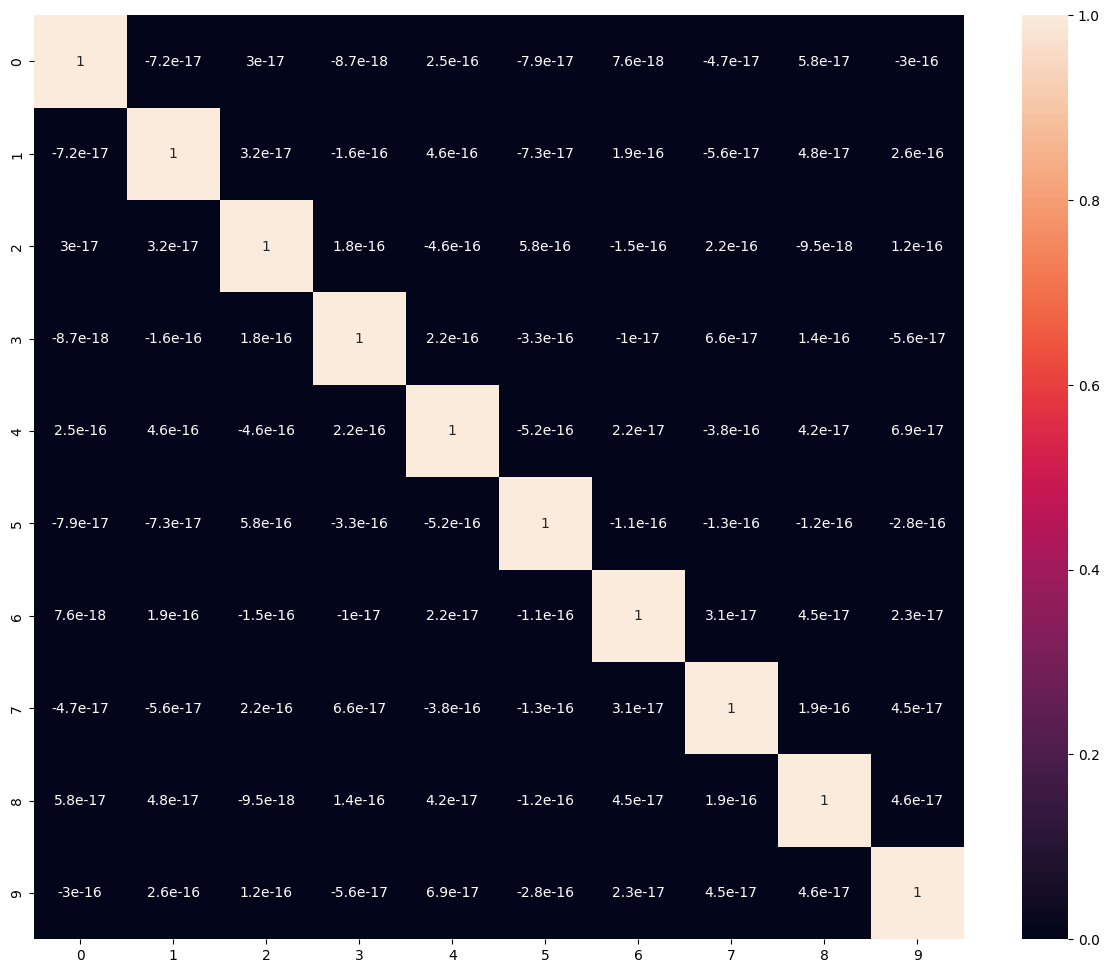

In [ ]:
plt.figure(figsize = (15,12))
dataplot = sns.heatmap(X_pca.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_pca_train, x_pca_test, ytrain, ytest = train_test_split(X_pca,Y,test_size = 0.25, shuffle= True, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
new_model = LogisticRegression(max_iter=2500)

In [ ]:
new_model.fit(x_pca_train,ytrain)

LogisticRegression(max_iter=2500)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
print("Testing accuracy:", np.round(accuracy_score(ytrain,new_model.predict(x_pca_train)), 2))

Testing accuracy: 0.86


In [ ]:
print("Training accuracy:", np.round(accuracy_score(ytrain,new_model.predict(x_pca_train)), 2))

Training accuracy: 0.86


In [ ]:
from sklearn import neighbors, tree, naive_bayes

In [ ]:
n_neighbors = 5
N_model = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
N_model.fit(xtrain, ytrain)

KNeighborsClassifier(weights='distance')

In [ ]:
prediction = N_model.predict(xtest)

In [ ]:
print(prediction)

[0 0 0 ... 0 0 0]


In [ ]:
N_model.score(xtest,ytest)

0.8264150943396227

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB = GaussianNB()

In [ ]:
GNB.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
GNB.score(xtest,ytest)

0.8141509433962264

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
BNB = BernoulliNB()

In [ ]:
BNB.fit(xtrain,ytrain)

BernoulliNB()

In [ ]:
BNB.score(xtest,ytest)

0.8367924528301887

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MNB = MultinomialNB()

In [ ]:
MNB.fit(xtrain,ytrain)

MultinomialNB()

In [ ]:
MNB.score(xtest,ytest)

0.769811320754717

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm = SVC(kernel='linear', probability=True)
svm.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True)

In [ ]:
decision_values = svm.decision_function(xtest)

In [ ]:
fpr, tpr, _ = roc_curve(ytest, decision_values)
roc_auc = auc(fpr, tpr)


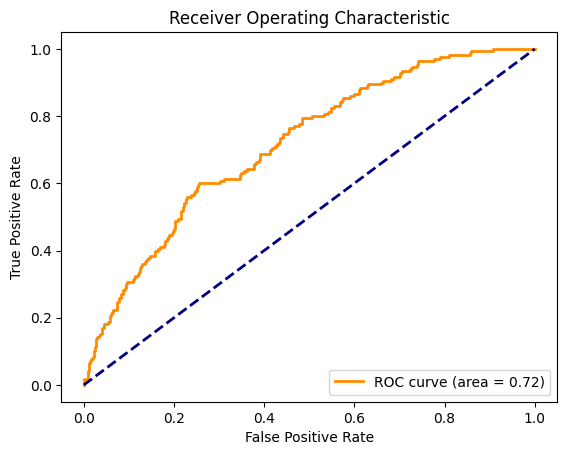

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(xtrain,ytrain)
predictions2 = rfc.predict(xtest)
print(confusion_matrix(ytest,predictions2))
print('\n')
print(classification_report(ytest,predictions2))
